In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea
import matplotlib.mlab as mlab

In [2]:
titanic=pd.read_csv('train.csv')
titanic.shape

(891, 12)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here, we have the dataset, *train.csv* downloaded from the Kaggle website. It contains the data about the sinking of the **RMS** **Titanic** on its maiden trip from Southampton to New York City. In this notebook, we will do some premilinary analysis and delve deeper into the data to gain some useful insight. Here, the variable **Survived** is the response variable, and rest are explanatory variables. Most of the variable names are self explanatory. The variable **Parch** refers to whether the passenger has any child aboard or his/her parents are aboard. Similarly, the variable **SibSp** refers to whether the passenger has any siblings or spouses aboard. 

The passengers boarded at different places, as mentioned in the dataset;
*S* stands for **Southampton**, *C* stands for **Cherbourg**, and *Q* stands for ** Queenstown**.


#   Question

We will investigate the proportion of survivors out of total number of passesngers, who boarded the ship at a given destination. In other words, we want to check; out of total number of passengers who embarked at a given place, what fraction of them were able to make it through the fateful incident. As an addition to this question, we will also look at the fare distribution for the passengers boarding at above three cities.

The second question, we want to answer; what was the distribution of survivors, based on the passenger class. Moreover, can we say something more about the gender of the survivors from the different classes? Here, we will discuss the first class passengers. Other passengers can be analyzed similarly.

# First Question:


To answer the first question, we will first identify the columns with missing values. If the column **Embarked** contains missing values, it will be helpful to replace them by reasonable values, depending on the values in the other entries of that cell.

In [3]:
#let us identify the columns containing missing values
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

**Handle Missing Values**

First, we observe the fare distribution as per Embarking city. We hope that it can give us some idea about the embarking city for the missing values in the **Embarked** column. We will first locate the missing values in the **Embarked** column.

In [4]:
#we have  a look at the rows containing missing values for the Embarked column
embark_missing=titanic[titanic['Embarked'].isnull()]
embark_missing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We see that for two female passengers, the city of embarking is missing. Both of them were traveling on the same ticket, and paid the same fare; 80 pounds. One intuition is; we can use the fare information to guess the vlaue of the embarking city for these two ladies. 

First, we calculate the mean fare grouped by the boarding city.

In [5]:
mean_fare_city=titanic.groupby('Embarked')['Fare'].mean() #calculate mean fare for each embarked city
mean_fare_city

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

To make sure the groupby is working properly, we can do a quick verification.

In [6]:
titanic_C = titanic[titanic['Embarked'] =='C']
titanic_C.shape

(168, 12)

In [7]:
mu_C=titanic_C['Fare'].mean()
mu_C

59.95414404761905

**Distribution of Fare for Different Embarking Cities:**

So the above calculation of mean is working properly. Using the above information about the mean, it seems that the people who embarked at Queenstown paid the lowest amount of fare. But thats only an intuition. We can look at fare distribution to get more information about it. We will start with the fare distribution of passengers embarking at Cherbourg.  

In [8]:
sigma_C=titanic_C['Fare'].std(ddof=0) #find standard deviation for the fare
sigma_C

83.66288046245174

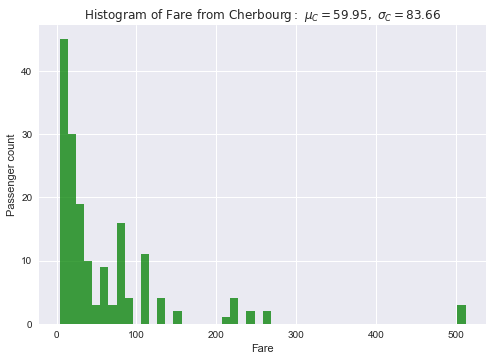

In [9]:
plt.hist(titanic_C['Fare'], 50, facecolor='green', alpha=0.75)
plt.xlabel('Fare')
plt.ylabel('Passenger count')
plt.title(r'$\mathrm{Histogram\ of\ Fare\ from\ Cherbourg:}\ \mu_C=59.95,\ \sigma_C=83.66$')
#plt.axis([40, 160, 0, 0.03])
#plt.grid(True


Here, we see that the distribution is right skewed. A significant outlier, can  be seen at fare value 500 pounds. Out of curiosity, we can check out those passengers.

In [10]:
titanic_C[titanic_C['Fare'] >=500] #identify the passesngers who purchased very costly tickets 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


We found out that it was the family of the Cardeza, who were travelling with their sevants on the same ticket, PC17755. For details, please refer to https://www.encyclopedia-titanica.org/titanic-first-class-passengers/

Next, we get the fare distribution for the passengers, who boarded at Queenstown.

In [18]:
titanic_Q=titanic[titanic['Embarked']=='Q']

In [19]:
#find mean and standard deviation for fare paid by passesngers, who boarded at Queenstown 

mu_Q=titanic_Q['Fare'].mean()
sigma_Q=titanic_Q['Fare'].std(ddof=0)
print (mu_Q)
print (sigma_Q)

13.276029870129872
14.095615717616525


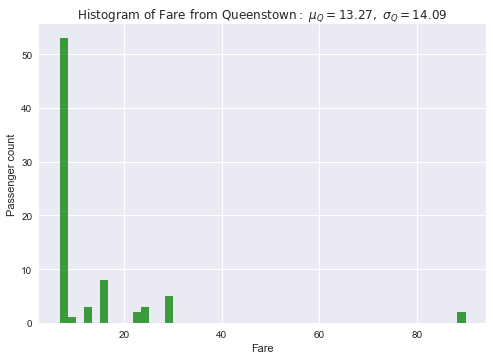

In [20]:
plt.hist(titanic_Q['Fare'], 50, facecolor='green', alpha=0.75)
plt.xlabel('Fare')
plt.ylabel('Passenger count')
plt.title(r'$\mathrm{Histogram\ of\ Fare\ from\ Queenstown:}\ \mu_Q=13.27,\ \sigma_Q=14.09$')



In [21]:
mean_fare=titanic.groupby('Pclass')['Fare'].mean()
mean_fare

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

It is evident from the above plot and mean_fare, that most of the passengers from Queenstown boarded the Titanic as 3rd class passengers; very low fares. It is evident from some historical articles too. Please refer to http://www.whitestarmomentos.co.uk/last_port_of_call.html  Next, we look at the passengers, who boarded at Southampton.

In [22]:
titanic_S = titanic[titanic['Embarked'] =='S']

In [23]:
#find mean and standard deviation for the fare paid by passengers who boarded at Southampton

mu_S=titanic_S['Fare'].mean()
sigma_S=titanic_S['Fare'].std(ddof=0)
print (mu_S)
print (sigma_S)

27.07981180124218
35.8601191861155


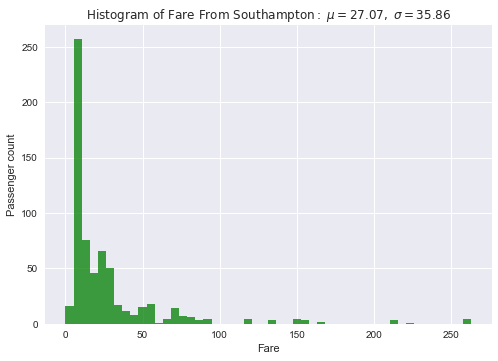

In [24]:
plt.hist(titanic_S['Fare'], 50, facecolor='green', alpha=0.75)
plt.xlabel('Fare')
plt.ylabel('Passenger count')
plt.title(r'$\mathrm{Histogram\ of\ Fare\ From\ Southampton:}\ \mu=27.07,\ \sigma=35.86$')


Going by the above histograms, we are certain that the two ladies, for whom the city of embarkment is missing did not board at Queenstown.  They paid the fare of 80 pounds, which is missing in fare distribution of the passesngers who embarked at Queenstown. We did some google study regarding the **RMS Titanic** disaster, and found that these two ladies boarded at Southampton. Please refer to https://www.encyclopedia-titanica.org/titanic-first-class-passengers/

**Alternative approach to Fare Distribution:**


We can also represent the fare distribution for the three different cities using Boxplot. But before doing that, we will replace the missing values for **Embarked** column by 'S'.

In [25]:
titanic.Embarked.fillna('S', inplace=True)

Next, we replace the alphabets **'S'**, **'C'**, and **'Q' ** by their full names.

In [26]:
#this function replaces abbreviations by the full city name

def replace(x):
    if x=='S':
        return 'Southampton'
    elif x=='C':
        return 'Cherbourg'
    else:
        return 'Queenstown'


In [27]:
#apply the above function to the dataset

titanic_new=titanic
titanic_new['Embarked']=titanic['Embarked'].map(replace)

In [28]:
titanic_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


Now, we sketch the  boxplot to get an idea for fare distribution, depending on the embarking cities.

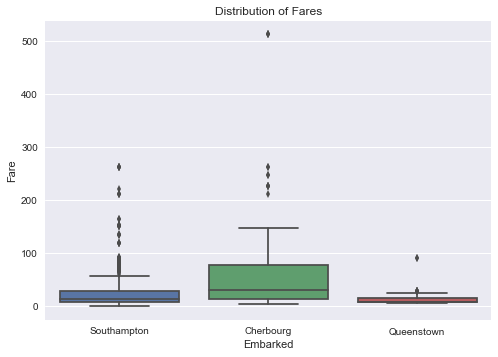

In [29]:
plt.title('Distribution of Fares')
sea.boxplot(x="Embarked",y="Fare",data=titanic_new)

We can see that the fare distributions for the three cities are right skewed. Similar behavior was observed above in the histograms. Moreover, for the city Cherbourg, we have a dominating outlier, which, seems to be raising the mean drastically. From the following statistics, we can deduce that the passesngers who boarded at Cherbourg were more well to do as compared to the passesngers, who embarked at the other two cities. We can look at descriptive statistics too to get more evidence.

In [30]:
print(titanic_C['Fare'].describe())
print(titanic_Q['Fare'].describe())
print(titanic_S['Fare'].describe())

count    168.000000
mean      59.954144
std       83.912994
min        4.012500
25%       13.697950
50%       29.700000
75%       78.500025
max      512.329200
Name: Fare, dtype: float64
count    77.000000
mean     13.276030
std      14.188047
min       6.750000
25%       7.750000
50%       7.750000
75%      15.500000
max      90.000000
Name: Fare, dtype: float64
count    644.000000
mean      27.079812
std       35.887993
min        0.000000
25%        8.050000
50%       13.000000
75%       27.900000
max      263.000000
Name: Fare, dtype: float64


**No. of Survivors By Embarking City:**
Next we observe the proportion of survivors, depending on the Embarking city.

In [31]:
#subset the passesngers who boarded at Cherbourg

titanic_new_C=titanic_new[titanic_new['Embarked']=='Cherbourg']
cherbourg_survived=titanic_new_C.groupby('Survived')['PassengerId'].count()
type(cherbourg_survived)

pandas.core.series.Series

In [32]:
cherbourg_survived

Survived
0    75
1    93
Name: PassengerId, dtype: int64

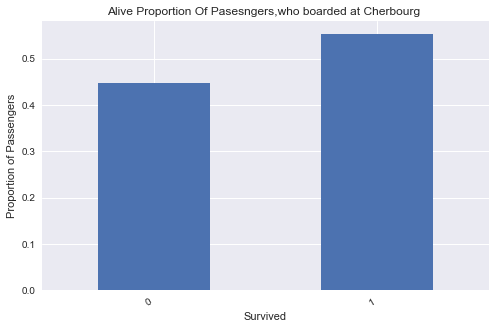

In [33]:
#plot the bar chart to denote the proportion of survivors who boarded at Cherbourg

vc = cherbourg_survived.sort_index()
vc /= float(vc.sum()) #obtain proportion
assert vc.sum() == 1
ax=vc.plot(kind='bar')
#ax.ylabel('proportion')
fig=ax.get_figure()
fig.autofmt_xdate()
plt.ylabel('Proportion of Passengers')
plt.title('Alive Proportion Of Pasesngers,who boarded at Cherbourg ')
#plt.bar(vc.index, vc, color="blue")

We see that around 45 % of the passengers who embarked at Cherbourg did not make through the accident. Next, we do similar analysis for the passesngers, who boarded at Southampton.

In [34]:
# subset the passengers, who boarded at Southampton

titanic_new_S=titanic_new[titanic_new['Embarked']=='Southampton']
southampton_survived=titanic_new_S.groupby('Survived')['PassengerId'].count()


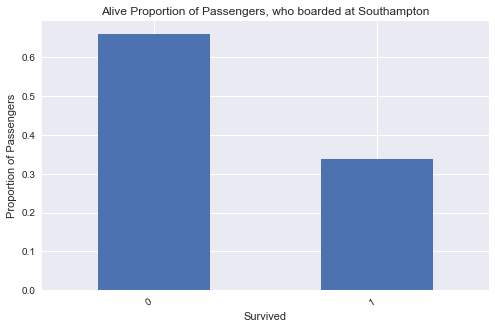

In [35]:
#plot the bar chart for the above dataset

vcnew = southampton_survived.sort_index()
vcnew /= float(vcnew.sum())
assert vcnew.sum() == 1
ax=vcnew.plot(kind='bar')
#ax.ylabel('proportion')
fig=ax.get_figure()
fig.autofmt_xdate()
plt.ylabel('Proportion of Passengers')
plt.title('Alive Proportion of Passengers, who boarded at Southampton')


We see that 65% of passesngers who embarked at Southampton  went down with the ship. That is  unfortunately quite a big number. Last, we look at the data about passesngers, who boarded at Queenstown.  

In [36]:
#subset the passengers, who boarded at Queenstown

titanic_new_Q=titanic_new[titanic_new['Embarked']=='Queenstown']
queenstown_survived=titanic_new_Q.groupby('Survived')['PassengerId'].count()



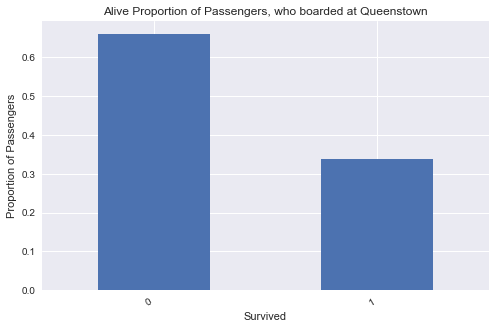

In [37]:
#plot the bar chart for above dataset

vcnew2 = queenstown_survived.sort_index()
vcnew2 /= float(vcnew2.sum())
assert vcnew2.sum() == 1
ax=vcnew.plot(kind='bar')
#ax.ylabel('proportion')
fig=ax.get_figure()
fig.autofmt_xdate()
plt.ylabel('Proportion of Passengers')
plt.title('Alive Proportion of Passengers, who boarded at Queenstown')


Unfortunately, 65 % of the passengers who boarded at Queenstown went down with the sinking ship.

**Discussion about first question**:

We saw that the passengers who boarded at Cherbourg purchased relatively costlier tickets as compared to the passengers from other two cities. In addition, we saw that a large percentage of passengers from Southampton as well as Queenstown could not make through the fateful incident.

# Second question:  

Next, we will look at the proportion of survivors, grouped by the passenger class. We will also look at the gender distribution of the survivors. For this assignment, we will focus on the first class passesngers. Similar analysis can be done for other classes too.

First, we group the dataframe on two columns; Survived and Passesnger class. We name the new object as survived_class.

In [38]:
#obtain the count of passengers who survived for each class.

survived_class=titanic_new.groupby(['Survived','Pclass'])['PassengerId'].count()
survived_class=survived_class.reset_index()
type(survived_class)

pandas.core.frame.DataFrame

In [39]:
survived_class.rename(columns={'PassengerId':'Count'},inplace=True)

In [40]:
survived_class

,Survived,Pclass,Count
0,0,1,80
1,0,2,97
2,0,3,372
3,1,1,136
4,1,2,87
5,1,3,119


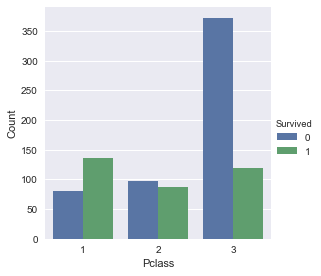

In [41]:
# we get the bar graph for survival data corresponding to each class

fg = sea.factorplot(x='Pclass', y='Count', hue='Survived', 
                         data=survived_class, kind='bar')

It is easy to notice from the above plot that most of the passengers in the third class did not make through that fateful incident on **RMS Titanic**. For the present analysis, we will focus at the passengers in first class. We will find the gender distribution among the survivors in the first class. 

To this end, we will subset the original dataframe, titanic_new.

In [42]:
#first, we subset the passengers from first class who survived.
first_class_survived=titanic_new[(titanic_new['Survived']==1) & (titanic_new['Pclass']==1)]

#next, we obtain the count of male and female passesngers from first class, who survived.
first_class_survived_sex=first_class_survived.groupby('Sex')['PassengerId'].count()

#We re-index the rows
first_class_survived_sex=first_class_survived_sex.reset_index()

#Rename the column
first_class_survived_sex.rename(columns={'PassengerId':'Count'},inplace=True)

In [43]:
first_class_survived_sex

,Sex,Count
0,female,91
1,male,45


We see that in the first class, 91 females and 45 males survived. It will be interesting to know the proportion of survivors in the first class. So, we subset all the first class passengers.

In [44]:
first_class=titanic_new[titanic_new['Pclass']==1]
first_class.shape

(216, 12)

We group by on basis of gender to get the following data frame, first_class_gender

In [45]:
# In order to obtain proportion, we group the first class passengers based on gender.

first_class_gender=first_class.groupby('Sex')['PassengerId'].count()
first_class_gender

Sex
female     94
male      122
Name: PassengerId, dtype: int64

In [46]:
first_class_gender=first_class_gender.reset_index() # reset the index
first_class_gender.rename(columns={'PassengerId':'total_Count'},inplace=True) # rename the columns to get relevant names
first_class_gender

,Sex,total_Count
0,female,94
1,male,122


Next, to find the proportion of survivors, we merge the data frames; *first_class_gender*, and *first_class_survived_sex* on the column *Sex*.

In [47]:
df_new = pd.merge(left=first_class_gender, right=first_class_survived_sex, how='inner', on='Sex')
df_new

,Sex,total_Count,Count
0,female,94,91
1,male,122,45


In [48]:
df_new.rename(columns={'Count':'survivor_Count'},inplace=True)
df_new['survivor_prop']=df_new['survivor_Count']/df_new['total_Count'] # we divide the two columns to obtain proportion
df_new

,Sex,total_Count,survivor_Count,survivor_prop
0,female,94,91,0.968085
1,male,122,45,0.368852


It is easy to notice from the above calculations that a vast majority of females travelling in the first class were able to survive that fateful incident, but the males had very low chances. One possible explanation can be attributed to the fact that males might have extended their help towards the females and let them use the lifeboats first. Since the lifeboats were limited in  number, this left a large number of males with a short supply of lifeboats.

# Conclusion: #

In this analysis, we looked at the survivor proportions for the passengers boarding at different cities. We observed different survivor proportions for different cities. This behavior can be attributed to the fact that first class passengers had higher survivor porportions, as seen in the analysis. It will be interesting to see the class distribution for the passengers from different cities. That can hopefully give some insight for the varying survivor proportions. While doing the analysis, couple of limitations were observed.

**Limitations**: First, we found out that most of the female passengers  were able to make through the incident. It would have been better if we could identify whether they were mostly older women, younger women or kids. Since the *Age* column contains missing values, it might be difficult to estimate. One approach is to impute the missing values, by the mean age. But that is not a very wise approach. It might give wrong estimates for the age group.

Second, we saw that passengers from Cherbourg paid higher fares as compared to the passengers from the other two cities. It might be not enough to claim that those passengers were financially well off. It might also happen that they just wanted to expereince the luxuries of **RMS Titanic** on its first trip. It would be helpful to have an extra column, which contains information about the occupation of the passengers.
